####  Tarea: XOR forward propagation
####  Curso: Statistical Learning II
####  Nombre: Axel Omar Meza Arrecis
####  Carné: 19006996

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Define Sigmoid function

In [2]:
def sigmoid(x):
  return(1 / (1 + np.exp(-x)))

### Define inputs (X) and Weigths (W1, W2)

In [3]:
# Define inputs (X) as the combinations of 0/1 for Xor
X = X_orig = np.array([[0,0],[0,1],[1,0],[1,1]])

# Add a column of 1's at the end of the X matrix, bias.
X = np.c_[X,np.ones(X.shape[0])]
X

array([[0., 0., 1.],
       [0., 1., 1.],
       [1., 0., 1.],
       [1., 1., 1.]])

In [4]:
# Define Weights of hidden layer

W1 = np.array([[20,-20],[20,-20],[-10,30]])
W1

array([[ 20, -20],
       [ 20, -20],
       [-10,  30]])

In [5]:
# Define Weights of output layer

W2 = np.array([[20],[20],[-30]])
W2

array([[ 20],
       [ 20],
       [-30]])

### Calculate H

In [6]:
# Get "H" values (hidden layer) after applying Sigmoid
H = H_orig = np.matmul(X, W1)
H = sigmoid(H)

# Add a column of 1's at the end of the matrix, bias.
H = np.c_[H, np.ones(H.shape[0])]
print("Values for H:\n\n", H_orig)
print("\n\nValues for sigmoid(H):\n\n", H)

Values for H:

 [[-10.  30.]
 [ 10.  10.]
 [ 10.  10.]
 [ 30. -10.]]


Values for sigmoid(H):

 [[4.53978687e-05 1.00000000e+00 1.00000000e+00]
 [9.99954602e-01 9.99954602e-01 1.00000000e+00]
 [9.99954602e-01 9.99954602e-01 1.00000000e+00]
 [1.00000000e+00 4.53978687e-05 1.00000000e+00]]


In [7]:
# Verify shapes to see if matmul will work
print(H.shape)
print(W2.shape)

(4, 3)
(3, 1)


In [8]:
# Get output values after applying Sigmoid

Output = sigmoid(np.matmul(H, W2))

print("The output obtained from the forward propagation: \n", Output)

The output obtained from the forward propagation: 
 [[4.54391049e-05]
 [9.99954520e-01]
 [9.99954520e-01]
 [4.54391049e-05]]


#### This output is the probability of y=1, P(y=1)

# Final result for XOR

For this exercise we will round the Output values to get the 0/1 output of the XOR

In [9]:
print("Values of the output for XOR in a 0/1 format:\n", np.round(Output))

Values of the output for XOR in a 0/1 format:
 [[0.]
 [1.]
 [1.]
 [0.]]


In [10]:
result=np.round(np.c_[X_orig, Output])

In [11]:
pd.DataFrame(result.astype(int), index=[0,1,2,3], columns=['x1','x2', 'XOR'])

,x1,x2,XOR
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


### Scatter for Sigmoid(H)

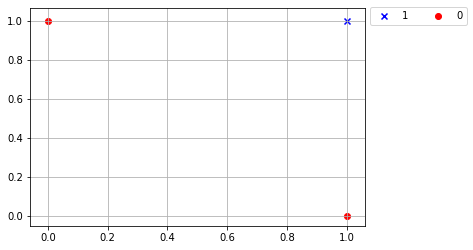

In [12]:
zero1 = plt.scatter(H[0,0], H[0,1], marker='o', color='red', label='0')
zero2 = plt.scatter(H[3,0], H[3,1], marker='o', color='red', label='0')
ones = plt.scatter(H[1:2,0], H[1:2,1], marker='x', color='blue', label='1')

plt.legend((ones, zero1, zero2),
           ('1', '0'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=10,
           bbox_to_anchor=(1.0, 0.9))
plt.grid(True, which='both')
plt.show()

### Scatter for H

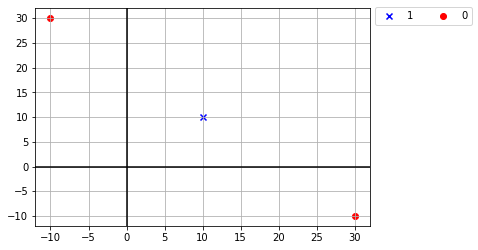

In [13]:
zero1 = plt.scatter(H_orig[0,0], H_orig[0,1], marker='o', color='red', label='0')
zero2 = plt.scatter(H_orig[3,0], H_orig[3,1], marker='o', color='red', label='0')
ones = plt.scatter(H_orig[1:2,0], H_orig[1:2,1], marker='x', color='blue', label='1')

plt.legend((ones, zero1, zero2),
           ('1', '0'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=10,
           bbox_to_anchor=(1.0, 0.9))

plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid(True, which='both')
plt.show()

# Conclusiones

Al evaluar el resultado intermedio de H se puede observar que la probabilidad que Y=1 está dado por la probabilidad que h1 y h2 (ambos) sea alta, dado que cuando h1 y h2 poseen una probabilidad alta, el resultado de final de XOR será Y=1; por el contrario, si alguno de h1 y h2 tienen una probabilidad baja de ser 1, el resultado final de XOR será Y=0.  Debe mencionarse que el bias es un factor determinante en este cálculo, al restar su valor neutraliza las probabilidad cuando solo h1 o solo h2 tienen un valor alto.

De igual forma puede observarse en la matriz H sin aplicar sigmoid, que mientras haya un valor negativo en h1 y h2, el resultado será Y=0, mientras que si ambos son positivos el resultado será Y=1.